<a href="https://colab.research.google.com/github/SophrosyneEunoia/Data-Adventure/blob/main/Ch.5%20-%20Deep%20Learning/TensorFlow%20Introduction%20-%20Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Train Data Exploration

In [4]:
# 60000 = jumlah foto, 28 = panjang, 28 = lebar

train_images.shape

(60000, 28, 28)

In [5]:
# 60000 banyaknya foto

len(train_labels)

60000

In [6]:
# Melihat 10 train_labels teratas

print(train_labels[:10])

[9 0 0 3 0 2 7 2 5 5]


In [7]:
# Melihat 10 jenis pakaian pertama

print([labels[num] for num in train_labels[:10]])

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


#### Test Data Exploration

In [8]:
# 10000 = jumlah foto, 28 = panjang, 28 = lebar

test_images.shape

(10000, 28, 28)

In [9]:
len(test_images)

10000

In [10]:
# Melihat 10 test_labels teratas

print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]


#### Data Preprocessing

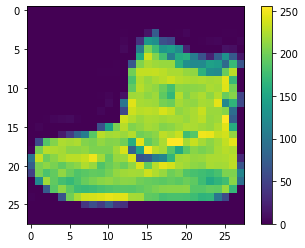

In [11]:
plt.imshow(train_images[0])
plt.colorbar() # add colorbar to plot
plt.grid(False) # hide axes and gridlines
plt.show()

In [12]:
# Rescale the images

train_images = train_images / 255.0
test_images = test_images / 255.0

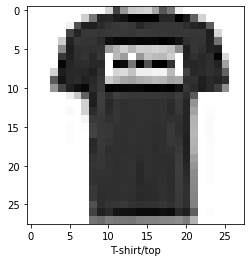

In [13]:
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(labels[train_labels[1]])
# plt.grid(False)
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy as SCC

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

model.compile(optimizer='adam', loss=SCC(from_logits=True), metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4955 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3748 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3364 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3105 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2781 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2652 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2542 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2435 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3406 - accuracy: 0.8835 - 531ms/epoch - 2ms/step
Test accuracy: 0.8834999799728394
